# Double 7's Portfolio (Short Term Trading Strategies that Work)

    1. The Security is above its 200-day moving average or X-day ma
    2. The Security closes at a 7-day low, buy.
    3. If the Security closes at a 7-day high, sell your long position.
    
    (For a Portfolio of securities.)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
# Symbol Lists
SP500_Sectors = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
Mixed_Asset_Classes = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
FANG_Stocks = ['FB', 'AMZN', 'NFLX', 'GOOG']
Stocks_Bonds_Gold = ['SPY', 'QQQ', 'TLT', 'GLD']

# Pick one of the above
symbols = Stocks_Bonds_Gold

capital = 10000
start = datetime.datetime(*pf.ALPHA_BEGIN)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 0.15,
    'margin' : 3.0,
    'period' : 7,
    'use_regime_filter' : True,
    'use_vola_weight' : True
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

STOP LOSS!!!
STOP LOSS!!!


View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2005-09-07,0,93.60,93,entry,LONG,TLT
1,2005-09-14,1,123.21,63,entry,LONG,SPY
2,2005-09-14,2,39.18,195,entry,LONG,QQQ
3,2005-09-29,3,122.66,63,exit,LONG,SPY
4,2005-09-29,4,39.20,195,exit,LONG,QQQ


In [7]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
603,2022-01-05,468.38,2022-01-31,449.91,-18.47,-3712.47,201,119088.56,LONG,SPY
604,2022-03-14,182.30,2022-03-23,181.81,-0.49,-299.88,612,118788.67,LONG,GLD
605,2022-03-28,179.06,2022-04-08,181.47,2.41,1426.72,592,120215.40,LONG,GLD
606,2022-04-05,451.03,2022-05-04,429.06,-21.97,-4943.25,225,115272.15,LONG,SPY
607,2022-04-22,180.29,2022-05-20,172.03,-8.26,-6120.66,741,109151.49,LONG,GLD


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2022-12-22,119151.49,119151.49,119151.49,0,119151.49,1.00,-
2022-12-23,119151.49,119151.49,119151.49,0,119151.49,1.00,-
2022-12-27,119151.49,119151.49,119151.49,0,119151.49,1.00,-
2022-12-28,119151.49,119151.49,119151.49,0,119151.49,1.00,-
2022-12-29,119151.49,119151.49,119151.49,0,119151.49,1.00,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                   2005-09-02
end                                                     2022-12-29
beginning_balance                                            10000
ending_balance                                           119151.49
total_net_profit                                         109151.49
gross_profit                                             250034.47
gross_loss                                              -140882.98
profit_factor                                                 1.77
return_on_initial_capital                                  1091.51
annual_return_rate                                           15.38
trading_period                           17 years 3 months 27 days
pct_time_in_market                                           65.42
margin                                                        3.00
avg_leverage                                                  1.27
max_leverage                                                  

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
SPY,"$32,462.31",0.25,0.30,1.19
GLD,"$11,366.58",0.25,0.10,0.42
TLT,"$25,941.41",0.25,0.24,0.95
QQQ,"$39,381.19",0.25,0.36,1.44
TOTAL,"$109,151.49",1.00,1.00,1.00


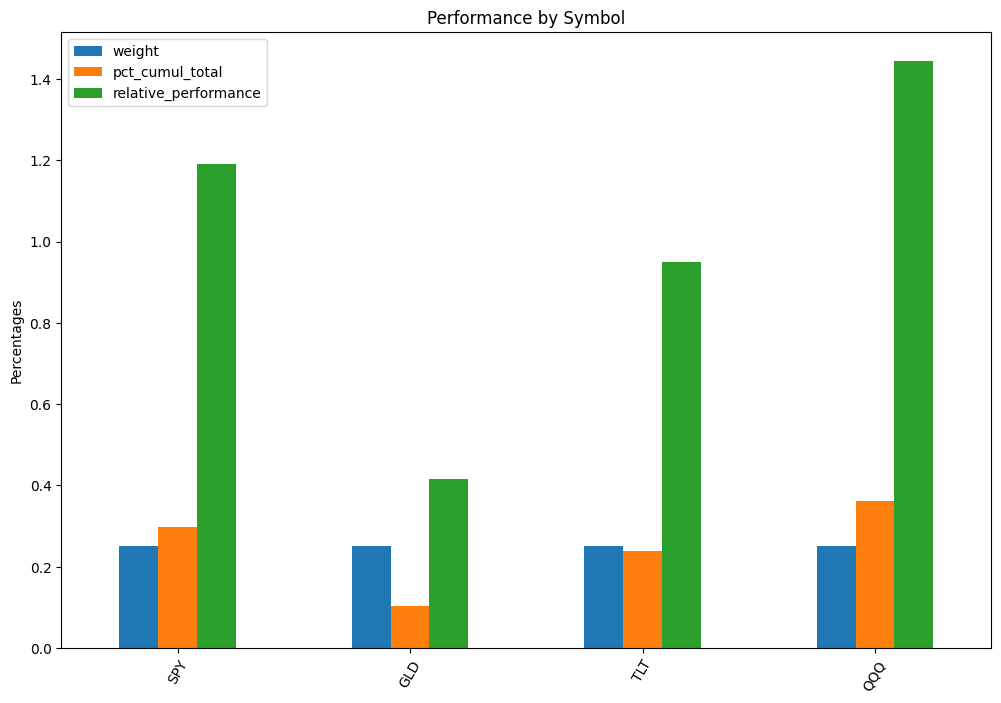

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,SPY,GLD,TLT,QQQ
SPY,1.00,0.05,-0.37,0.92
GLD,0.05,1.00,0.15,0.04
TLT,-0.37,0.15,1.00,-0.31
QQQ,0.92,0.04,-0.31,1.00


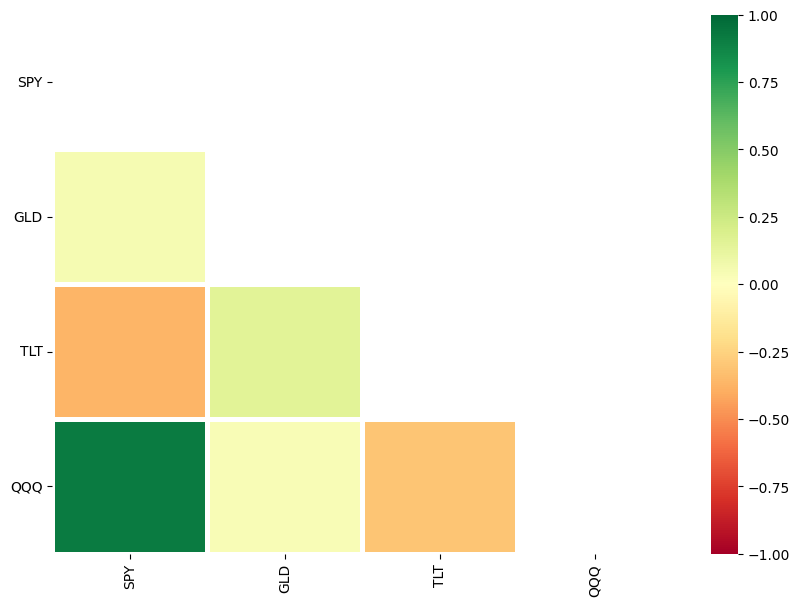

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

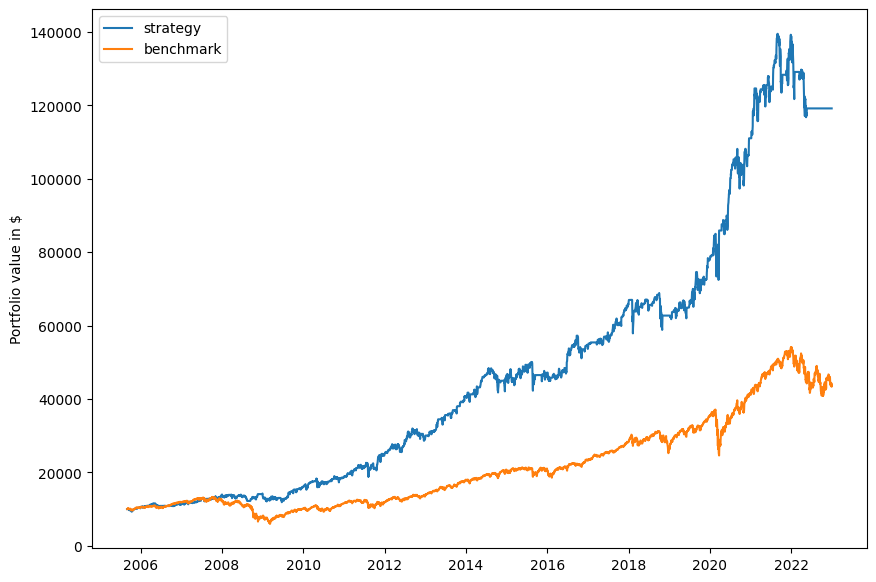

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,15.38,8.95
max_closed_out_drawdown,-16.79,-54.98
annualized_return_over_max_drawdown,0.92,0.16
best_month,20.92,23.57
worst_month,-14.76,-30.97
sharpe_ratio,0.90,0.53
sortino_ratio,0.98,0.65
monthly_std,3.85,4.67
annual_std,14.60,16.86


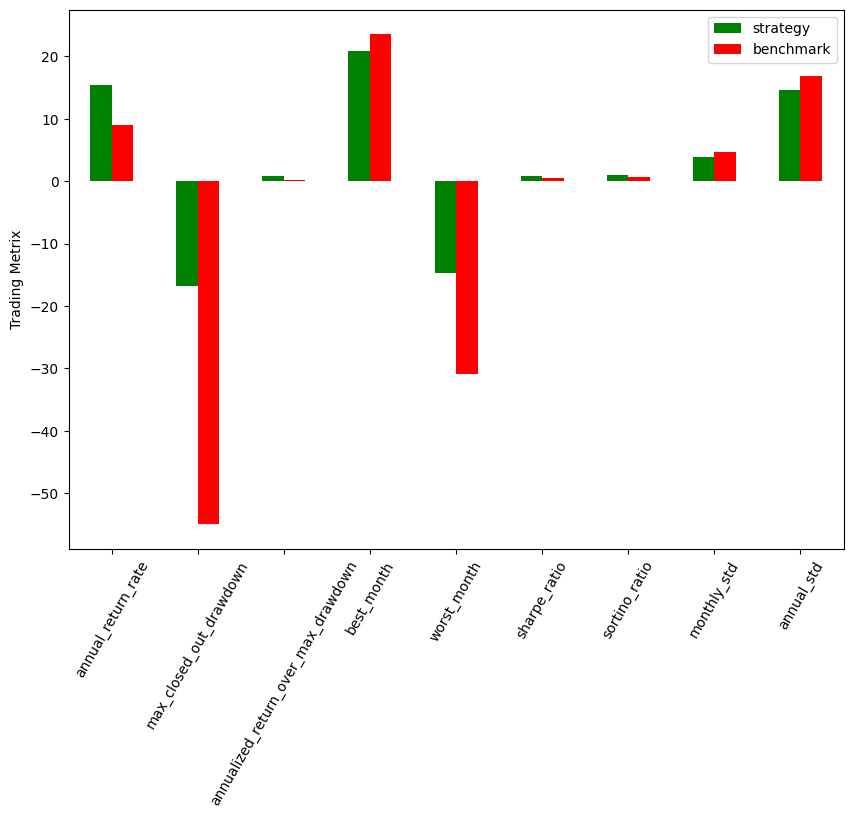

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.90
sharpe_ratio_max        0.95
sharpe_ratio_min        0.84
strategy risk           0.15
instrument risk         0.17
optimal target risk     0.90
half kelly criterion    0.45
aggressive leverage     5.33
moderate leverage       2.67
conservative leverage   2.51
dtype: float64